# Predicting mushroom edibility based on appereance




In [1]:
#Basic imports cell
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn import tree

## Fetching and cleaning the data:
ucimlrepo is needed for data import. Everything is under functions to demonstrate how the data is processed. However, I will be loading the data from csv after processing and writing it once.

In [2]:
#Comment this out if install is needed
#%pip install ucimlrepo
#%pip install seaborn
#%pip install scikit-learn

In [3]:
#Import data
#Further documentation available: https://github.com/uci-ml-repo/ucimlrepo
from ucimlrepo import fetch_ucirepo 
# fetch dataset
def importdata():
    mushroom = fetch_ucirepo(id=73) #data
    df=mushroom.data.original
    df.drop(columns=['stalk-root','veil-type'], inplace=True)
    return df

#Helper for mapping ring number numeric
def ringmap(v):
    res = []
    mapp = {"n":0, "o":1, "t":2}
    for x in v:
        item = mapp[x]
        res.append(item)
    return pd.to_numeric(pd.Series(res))

def cleandata():
    df = importdata()
    newdf = df.iloc[:,[3,6,7,9,14,15,20]]
    newdf.columns=["Bruises","Crowded gills","Broad gills","Tapering stalk","White veil","Ring-number","Poisonous"]
    for col in ["Bruises","Crowded gills","Broad gills","Tapering stalk","White veil","Poisonous"]:
        newdf.loc[:,col] = (newdf.loc[:,col]==newdf.loc[0,col]).astype(int)
    newdf.loc[:,'Broad gills']= (newdf.loc[:,'Broad gills']==0).astype(int)
    newdf.loc[:,'Tapering stalk']= (newdf.loc[:,'Tapering stalk']==0).astype(int)
    newdf.loc[:,"Ring-number"] = newdf.loc[:,"Ring-number"].apply(lambda x: ringmap(x))
    df_cat = df.iloc[:,[0,1,2,4,8,10,11,12,13,16,17,18,19]]
    #logic to convert categorical variables to binary
    for col in df_cat.columns:
        uniq = df_cat.loc[:,col].unique()
        for u in uniq:
            name = col + " is "+ u
            data = (df_cat.loc[:,col] == u).astype(int)
            newdf.loc[:,[name]] = data   #fix this
    return newdf

def writecsv():
    df = cleandata()
    df.to_csv("data.csv", sep=';', encoding="utf-8", index=False, header=True)
    print("Csv written to data.csv")
    return



In [4]:
#get data
def getdata(name="data.csv"):       #default to the original, uncleaned one.
    df = pd.read_csv(name, sep=';', encoding="utf-8")
    y = df["Poisonous"]
    X = df.drop(columns=["Poisonous"])
    return X, y

def getmodel(p="l1"):
    res = LogisticRegression(penalty=p, solver='liblinear', max_iter=100)
    return res
def previewdata():
    preview_x,preview_y= getdata()
    objX = preview_x
    objX = objX.map(str)
    return objX
#previewdata()

In [5]:
def getimportantfeatures():
    X,y=getdata()
    model= getmodel()
    coef = {}
    for i in range(0,50):
        x_tmp1, x_tmp2,y_tmp1,y_tmp2 = sklearn.model_selection.train_test_split(X,y, train_size=0.5)
        coef[i]=model.fit(x_tmp1,y_tmp1).coef_.reshape(-1,)
        coef[50+i]=model.fit(x_tmp2,y_tmp2).coef_.reshape(-1,)
    return coef


In [6]:
def writecleancsv():
    coefm = getimportantfeatures()
    coef_df = pd.DataFrame(data=coefm)
    m = coef_df.iloc[:,:]!= 0
    m=m.sum(axis=1)
    #countframe = pd.DataFrame(m.array.reshape(1,-1)) the counts can be examined by printing this
    m = m.values>10
    X,y = getdata()
    cols = X.columns
    m = list(cols[m])
    X=X[m]
    X["Poisonous"]= y
    X.to_csv("cleaned_data.csv", sep=';', encoding="utf-8", index=False, header=True)
    return



In [7]:
X,y = getdata("cleaned_data.csv")
X


,Bruises,Crowded gills,Broad gills,cap-shape is b,cap-surface is y,cap-surface is f,cap-surface is g,cap-color is w,odor is p,odor is a,...,stalk-surface-below-ring is y,stalk-color-below-ring is y,ring-type is p,spore-print-color is w,spore-print-color is r,population is v,population is y,population is c,habitat is w,habitat is l
0,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8120,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
8121,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8122,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [8]:
# Lets first run vanilla cross-validation


def vanillacv():
    X,y = getdata("cleaned_data.csv")
    model = getmodel("l1")
    cv = cross_validate(model,X,y,cv=ShuffleSplit(n_splits=80, test_size=0.2),scoring=['accuracy','precision','recall'], return_train_score=True)
    #Visualize
    fig, ax  = plt.subplots(3,1)
    print(f"test_recall mean was {cv['test_recall'].mean()}")
    ax[0].plot(np.linspace(1,80,80),cv["train_accuracy"],"r",label = "test accuracy")
    ax[0].plot(np.linspace(1,80,80),cv["test_accuracy"],"b",label = "train accuracy")
    ax[1].plot(np.linspace(1,80,80),cv["train_precision"],"r",label = "train precision") #ratio of true positives out of all
    ax[1].plot(np.linspace(1,80,80),cv["test_precision"],"b",label = "test precision")
    ax[2].plot(np.linspace(1,80,80),cv["train_recall"],"r",label = "train recall") #ratio of poisonous labeled correctly
    ax[2].plot(np.linspace(1,80,80),cv["test_recall"],"b",label = "test recall")
    #print(cv.coef_)
    plt.show()
    return
#vanillacv()
#evaluatepenalties()

def fitmodel():
    X,y = getdata("cleaned_data.csv")
    model = getmodel("l1")
    cv = cross_validate(model,X,y,scoring=['precision','recall'], return_train_score=True, return_estimator=True)
    print(cv["test_recall"])
    print(cv["test_precision"])
    coef = sum(map((lambda x: x.coef_),cv["estimator"]))/5
    print(coef)
    return coef


#Model seems to predict very precisely. However, we would like rather high recall as it is important to not eat poisonous mushrooms even if that means leaving some of the edible ones out
#The ratio can be adjusted with decision boundary parameter, which can't be done through model-object. Could implement logic handle that through .proba()
#meh

#Changed penalty='l1', solver='liblinear' and got perfect model... Dunno if there is a dog buried

In [9]:
#Tools for further Feature selection


#pcamodel = sklearn.decomposition.PCA(n_components=10)
#pcamodel.fit(X)
#pcamodel.explained_variance_


#importances = pd.DataFrame(importancemeans.reshape(1,-1), index=["importancemeans"],columns=X.columns)
# Try to cut features using permutation_importance
def getImportanceMeans():
    X,y = getdata()
    model = getmodel().fit(X,y)
    res = sklearn.inspection.permutation_importance(model, X, y, scoring="recall", n_repeats=10)
    return res["importances_mean"]

def getsortedimportancemeans(imeans):
    return sorted(imeans)[::-1]


def reducedcv(start,end):
    res = []
    X,y = getdata()
    i_means = getImportanceMeans()
    sortedmeans = getsortedimportancemeans(i_means)

    for i in range(start,end):
        mask = i_means >= sortedmeans[i]
        X_reduced = X.iloc[:,mask]
        model = getmodel()
        cv = cross_validate(model,X_reduced,y,cv=ShuffleSplit(n_splits=40),scoring=['accuracy','precision','recall'], return_train_score=True)
        print(f"test_recall mean was{cv['test_recall'].mean()}")
        #fig, ax  = plt.subplots(3,1)
        #ax[0].plot(np.linspace(1,80,80),cv["train_accuracy"],"r",label = "test accuracy")
        #ax[0].plot(np.linspace(1,80,80),cv["test_accuracy"],"b",label = "train accuracy")
        #ax[1].plot(np.linspace(1,80,80),cv["train_precision"],"r",label = "train precision") #ratio of true positives out of all pred pos
        #ax[1].plot(np.linspace(1,80,80),cv["test_precision"],"b",label = "test precision")
        #ax[2].plot(np.linspace(1,80,80),cv["train_recall"],"r",label = "train recall") #ratio of poisonous labeled correctly
        #ax[2].plot(np.linspace(1,80,80),cv["test_recall"],"b",label = "test recall")
        #plt.show()
        res.append(cv['test_recall'].mean())
    return res


In [10]:
#init data for models

X,y = getdata("cleaned_data.csv")
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)                # take separate test set






In [11]:
# first model
logres = getmodel(p="l1")
cv = cross_validate(logres, X_train,y_train, scoring="recall", return_estimator=True, return_train_score=True)
cv
estimators = cv["estimator"]
model1 = estimators[2]
train_score=cv["train_score"][2]
print(train_score)
recall_score(model1.predict(X_test), y_test)

#Model seems to work rather well



1.0


1.0

Training recall 1.0 
Testing recall  1.0


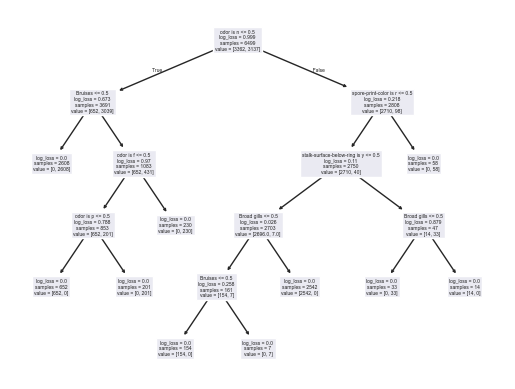

In [12]:
#second model 
treeModel = tree.DecisionTreeClassifier(criterion="log_loss")
treeModel.fit(X_train,y_train)
train_recall = recall_score(treeModel.predict(X_train), y_train)
test_recall = recall_score(treeModel.predict(X_test), y_test)
print("Training recall", train_recall, "\nTesting recall ", test_recall)
tree.plot_tree(treeModel, feature_names=X_train.columns)
plt.savefig("tree.pdf")

# Model 2 seems also be working rather well

